In [78]:
import numpy as np
import tensorflow as tp
import matplotlib.pyplot as plt

In [79]:
from tensorflow.keras import layers, models, datasets

In [80]:
from tensorflow.keras.utils import to_categorical

### **Load the mnist dataset : **

In [81]:
(train_images, train_labels), (test_images, test_labels) = datasets.mnist.load_data()

### preprocessing: Normalizing the pixel value to between 0 and 1

In [82]:
train_images = train_images/255.0
test_images = test_images/255.0

### reshape the image to 28,28,1 as they are greyscale :
### CNN expect each image in 3d shape (height, width and channel)
### **mnist image are greyscale each has only one channel that's why 28,28,1 which represent height width and color channel**

In [83]:
train_images = train_images.reshape((train_images.shape[0], 28, 28, 1))
test_images = test_images.reshape((test_images.shape[0] ,28,28,1))

### convert the labels to one-hot encoded format :

In [84]:
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

### **Build the CNN Model : **

In [85]:
model = models.Sequential()

**now first convolutional layers :**

In [86]:
model.add(layers.Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)))
#32 = no. of filters
#(3,3) = size of each filter
#Relu is activation function applied to each pixel, setting negative value to 0
# input shape = input dimension of the first layer

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [87]:
model.add(layers.MaxPooling2D((2,2)))
#max pooling layer = reduce the size of the image by taking max value of each 2*2 pixel

***now second convolutional layer : ***

In [88]:
model.add(layers.Conv2D(64, (3,3), activation= 'relu' ))

In [89]:
model.add(layers.MaxPooling2D((2,2)))

***Third convolutional layer : ***

In [90]:
model.add(layers.Conv2D(64, (3,3), activation='relu'))

### Flatten the 3D output to 1D and add a dense layer :

In [91]:
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))

### now output layers with 10 neurons (for 10 digits classes)

In [92]:
model.add(layers.Dense(10, activation='softmax'))
# softmax convert the output to probability distribution helping the model to classify the each digit

compile the model :

In [93]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
'''
adam is a popular optimization algorithm for deep learning
categorical_crossentropy is the loss function used for multi-class classification problems
'''

'\nadam is a popular optimization algorithm for deep learning\ncategorical_crossentropy is the loss function used for multi-class classification problems\n'

### now train the model :

In [95]:
model.fit(train_images, train_labels, epochs=5 , batch_size=64, validation_data=(test_images, test_labels))
# epochs=5 means that model will see the entire dataset 5 times

Epoch 1/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 59s 61ms/step - accuracy: 0.8737 - loss: 0.4214 - val_accuracy: 0.9840 - val_loss: 0.0529
Epoch 2/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 56s 60ms/step - accuracy: 0.9842 - loss: 0.0523 - val_accuracy: 0.9832 - val_loss: 0.0477
Epoch 3/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 83s 61ms/step - accuracy: 0.9891 - loss: 0.0357 - val_accuracy: 0.9895 - val_loss: 0.0320
Epoch 4/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 55s 59ms/step - accuracy: 0.9913 - loss: 0.0281 - val_accuracy: 0.9914 - val_loss: 0.0255
Epoch 5/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 86s 63ms/step - accuracy: 0.9934 - loss: 0.0211 - val_accuracy: 0.9880 - val_loss: 0.0361


### **Evaluate the model on the test data : **

In [96]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f"Test Accuracy : {test_acc*100:.2f}%")

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.9841 - loss: 0.0476
Test Accuracy : 98.80%


### ***now make prediction on the test image : ***

In [97]:
prediction = model.predict(test_images)
print(f"Prediction for the first test image : {np.argmax(prediction[4])}")
# np.argmax find the index with highest probability in the first prediction

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step
Prediction for the first test image : 4


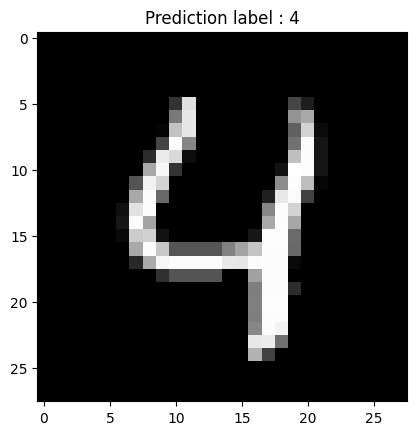

In [98]:
plt.imshow(test_images[4].reshape(28,28), cmap='gray')
plt.title(f"Prediction label : {prediction[4].argmax()}")
plt.show()

In [99]:
prediction = model.predict(test_images)
print(f"Prediction for the first test image : {np.argmax(prediction[2])}")
# np.argmax find the index with highest probability in the first prediction

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step
Prediction for the first test image : 1


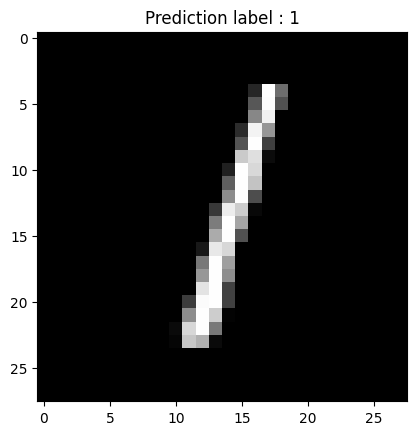

In [100]:
plt.imshow(test_images[2].reshape(28,28), cmap='gray')
plt.title(f"Prediction label : {prediction[2].argmax()}")
plt.show()